<a href="https://colab.research.google.com/github/deigo-lps/Image-Processing/blob/main/Atividade_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
from colorsys import hsv_to_rgb, rgb_to_hsv

In [ ]:
def getHsvImage(path):
  img = np.array(Image.open(path).convert("RGB")).astype(np.float32)
  for i in range(0,3):
    #rgb_to_hsv requer valores rgb entre 0 e 1
    img[:,:,i] = img[:,:,i]/255
  for i in range(len(img)):
    for j in range(len(img[i])):
      img[i][j]=rgb_to_hsv(img[i][j][0],img[i][j][1],img[i][j][2])
  return img

def getRgbImage(img):
  for i in range(len(img)):
    for j in range(len(img[i])):
      r,g,b = hsv_to_rgb(img[i][j][0], img[i][j][1], img[i][j][2])
      img[i][j][0] = r*255
      img[i][j][1] = g*255
      img[i][j][2] = b*255
  return np.array(img).astype(np.uint8)

In [ ]:
def mostra_histograma(imagem,titulo):
  plt.hist(imagem.flatten(), bins=256, range=(0, 256))
  plt.title(titulo)
  plt.xlabel('Valor de cinza')
  plt.ylabel('Frequência')
  plt.show()

In [ ]:
def equalizacao(imagem):
  niveis_equalizados = np.zeros_like(imagem).flatten()
  imagem_flat = imagem.flatten()
  size = imagem.size
  nivel_equalizado = np.zeros(256).astype(np.uint8)
  def G(k):
    result = 0
    for i in range(0,k):
      result = result + np.count_nonzero(imagem_flat == i)/size
    return result
  for i in range(0,256):
    nivel_equalizado[i] = int(G(i)*255)
  for i in range(0,size):
    niveis_equalizados[i]=nivel_equalizado[imagem_flat[i]]
  return (niveis_equalizados).reshape(imagem.shape)

In [ ]:
img1 = getHsvImage("Img1.bmp")
img2 = getHsvImage("Img2.bmp")
img3 = getHsvImage("Img3.bmp")

In [ ]:
img1_grays = np.asarray(img1[:,:,2]*255).astype(np.uint8)
img2_grays = np.asarray(img2[:,:,2]*255).astype(np.uint8)
img3_grays = np.asarray(img3[:,:,2]*255).astype(np.uint8)

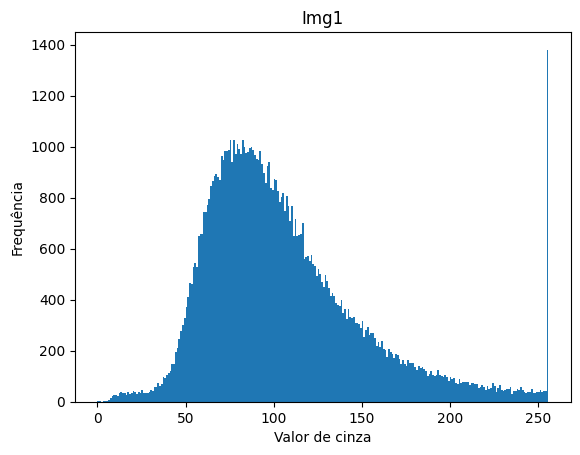

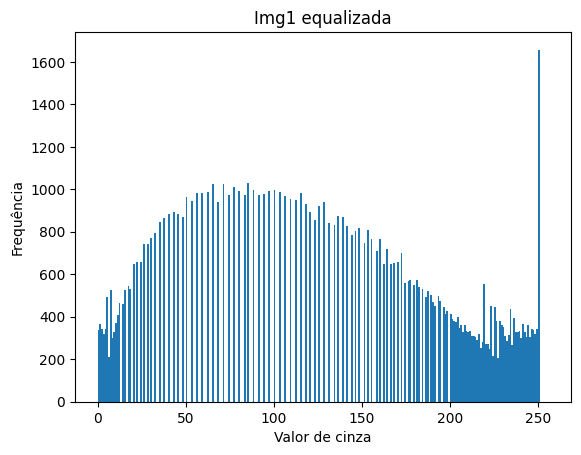

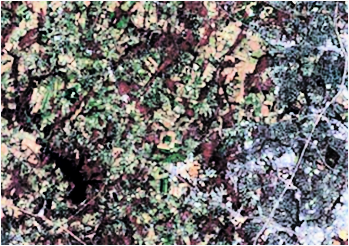

In [ ]:
mostra_histograma(img1_grays,'Img1')
mostra_histograma(equalizacao(img1_grays),'Img1 equalizada')
img1[:,:,2] = equalizacao(img1_grays)/255
Image.fromarray(getRgbImage(img1),"RGB").show()

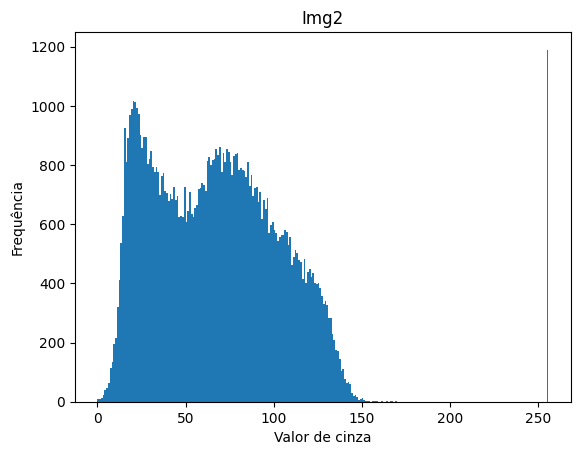

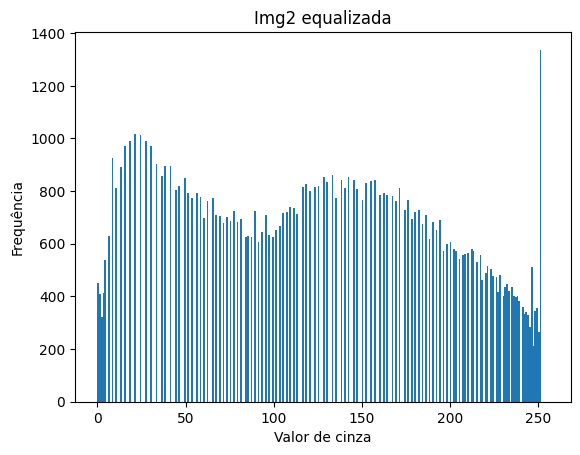

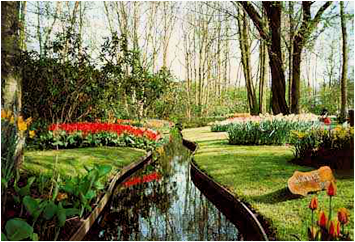

In [ ]:
mostra_histograma(img2_grays,'Img2')
mostra_histograma(equalizacao(img2_grays),'Img2 equalizada')
img2[:,:,2] = equalizacao(img2_grays)/255
Image.fromarray(getRgbImage(img2),"RGB").show()

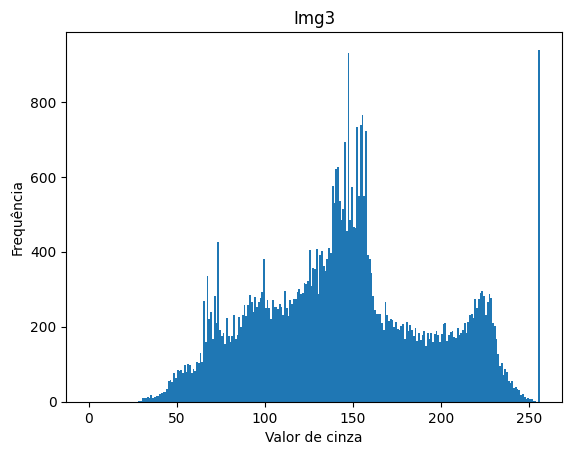

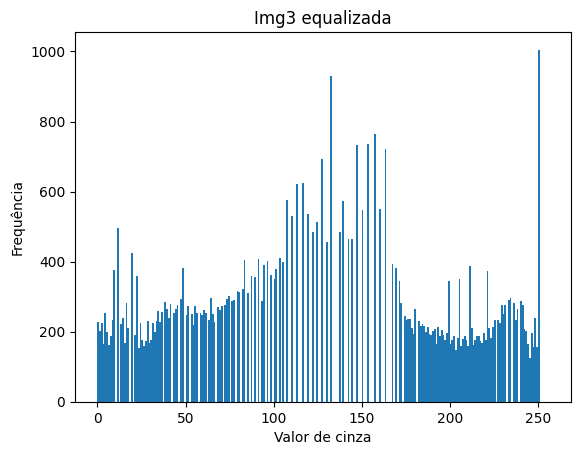

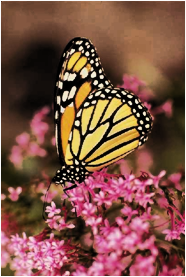

In [ ]:
mostra_histograma(img3_grays,'Img3')
mostra_histograma(equalizacao(img3_grays),'Img3 equalizada')
img3[:,:,2] = equalizacao(img3_grays)/255
Image.fromarray(getRgbImage(img3),"RGB").show()

In [ ]:
def fatiamento_intensidade(imagem):
  imgArray = np.array(imagem).astype(np.float32)
  hsvArray = np.zeros_like(imgArray)
  for x in range(len(imgArray)):
    for y in range(len(imgArray[x])):
      #converte rgb para hsv
      hsvArray[x][y] = rgb_to_hsv(imgArray[x][y][0]/255,imgArray[x][y][1]/255,imgArray[x][y][2]/255)
      #converte a intensidade entre 0 e 255 para 0 e 240 graus, que corresponde as cores
      #vermelho verde e azul em hsv
      hsvArray[x][y][0] = (float(hsvArray[x][y][2]-0) / (255-0)) * 240
      #atribui 1(valor máximo) à saturação e luminância
      hsvArray[x][y][1] = hsvArray[x][y][2] = 1
      r,g,b = hsv_to_rgb(hsvArray[x][y][0],hsvArray[x][y][1],hsvArray[x][y][2])
      imgArray[x][y][0] = b*255
      imgArray[x][y][1] = g*255
      imgArray[x][y][2] = r*255
  imgArray = np.array(imgArray).astype(np.uint8)
  Image.fromarray(imgArray,"RGB").show()

In [ ]:
imagemFatiamento = Image.open("Img5.bmp").convert("RGB")

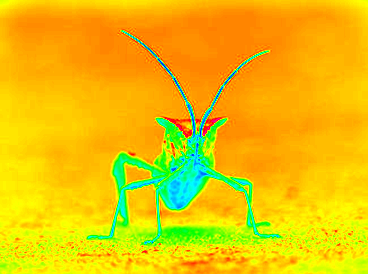

In [ ]:
fatiamento_intensidade(imagemFatiamento)